<a href="https://colab.research.google.com/github/klnsuman/DeepLearning/blob/master/Assignment_VisionDataset_Grp160.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1) Import Required Libraries

In [ ]:
import tensorflow as tf

from tensorflow.keras import layers
from tensorflow.keras import models

import random
import numpy as np

import pickle
from __future__ import print_function
import keras
from keras.datasets import cifar10
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
import os

# 2) Adding GPU


In [ ]:
!nvidia-smi

Sun Oct 18 12:29:20 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 455.23.05    Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   38C    P0    26W / 250W |      0MiB / 16280MiB |      0%      Default |
|                               |                      |                 ERR! |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
print("GPU is", "available" if tf.config.list_physical_devices('GPU') else "NOT AVAILABLE")

GPU is available


# 3) Connecting to Google Drive

In [ ]:
# Import PyDrive and associated libraries.
# This only needs to be done once per notebook.
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# Authenticate and create the PyDrive client.
# This only needs to be done once per notebook.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

# Download a file based on its file ID.
#
# A file ID looks like: laggVyWshwcyP6kEI-y_W3P8D26sz
file_id = '1tnQPfAconuACqRfIm0lC7zwJFd0LFj8N'
downloaded = drive.CreateFile({'id': file_id})
print('Downloaded content "{}"'.format(downloaded.GetContentString()))

Downloaded content "Hellow World"


# 4) Mount Google Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# 5)  Pre Process the Image Batch Data 

In [ ]:
def unpickle(file):
    
  with open(file, 'rb') as fo:
    dict = pickle.load(fo, encoding='bytes')
    return dict

   #
      **Change Directory in Google Drive to point to Batch Files**

In [ ]:
import os
os.chdir('/content/drive/My Drive/cifar-10-batches-py/')

In [ ]:
!ls -lrt

total 181856
-rw------- 1 root root 31035526 Mar 31  2009 test_batch
-rw------- 1 root root 31035999 Mar 31  2009 data_batch_3
-rw------- 1 root root 31035320 Mar 31  2009 data_batch_2
-rw------- 1 root root 31035623 Mar 31  2009 data_batch_5
-rw------- 1 root root 31035704 Mar 31  2009 data_batch_1
-rw------- 1 root root 31035696 Mar 31  2009 data_batch_4
-rw------- 1 root root       88 Jun  4  2009 readme.html
-rw------- 1 root root      158 Oct  9 09:21 batches.meta
drwx------ 2 root root     4096 Oct 12 09:32 saved_models




> **Unpickle**



In [ ]:
#data_dir = '/content/drive/"My Drive"/cifar-10-batches-py/'
batch1=unpickle('data_batch_1')

batch2=unpickle('data_batch_2')
batch3=unpickle('data_batch_3')
batch4=unpickle('data_batch_4')
batch5=unpickle('data_batch_5')



In [ ]:
!ls -lrt /content/drive/"My Drive"/cifar-10-batches-py/

total 181856
-rw------- 1 root root 31035526 Mar 31  2009 test_batch
-rw------- 1 root root 31035999 Mar 31  2009 data_batch_3
-rw------- 1 root root 31035320 Mar 31  2009 data_batch_2
-rw------- 1 root root 31035623 Mar 31  2009 data_batch_5
-rw------- 1 root root 31035704 Mar 31  2009 data_batch_1
-rw------- 1 root root 31035696 Mar 31  2009 data_batch_4
-rw------- 1 root root       88 Jun  4  2009 readme.html
-rw------- 1 root root      158 Oct  9 09:21 batches.meta
drwx------ 2 root root     4096 Oct 12 09:32 saved_models




> **Read Input From Batch Files**



In [ ]:
import numpy as np
def cifar_10_reshape(batch_arg):
    output=np.reshape(batch_arg,(10000,3,32,32)).transpose(0,2,3,1)
    return output

batch1_data=cifar_10_reshape(batch1[b'data'])
batch2_data=cifar_10_reshape(batch2[b'data'])
batch3_data=cifar_10_reshape(batch3[b'data'])
batch4_data=cifar_10_reshape(batch4[b'data'])
batch5_data=cifar_10_reshape(batch5[b'data'])

batch1_labels=batch1[b'labels']
batch2_labels=batch2[b'labels']
batch3_labels=batch3[b'labels']
batch4_labels=batch4[b'labels']
batch5_labels=batch5[b'labels']

In [ ]:
print(len(batch1_data))
print(len(batch2_data))
print(len(batch3_data))
print(len(batch4_data))
print(len(batch5_data))

10000
10000
10000
10000
10000


In [ ]:
batch1_data.shape

(10000, 32, 32, 3)

In [ ]:
os.listdir()

['test_batch',
 'data_batch_3',
 'data_batch_2',
 'data_batch_5',
 'data_batch_1',
 'data_batch_4',
 'readme.html',
 'batches.meta',
 'saved_models']


> **PreProcess Test Data** 



In [ ]:
data_dir = '/content/drive/"My Drive"/cifar-10-batches-py/'
batch1=unpickle('test_batch')

test_batch=unpickle('test_batch')
test_images=cifar_10_reshape(test_batch[b'data'])
test_labels_data=test_batch[b'labels']


In [ ]:
train_images=np.concatenate((batch1_data,batch2_data,batch3_data,batch4_data,batch5_data),axis=0)
train_labels_data=np.concatenate((batch1_labels,batch2_labels,batch3_labels,batch4_labels,batch5_labels),axis=0)

In [ ]:
train_images.shape 

(50000, 32, 32, 3)

In [ ]:
!ls

batches.meta  data_batch_2  data_batch_4  readme.html	test_batch
data_batch_1  data_batch_3  data_batch_5  saved_models




```
```
## Label Info
```
```
```
airplane    0
automobile  1
bird        2
cat         3
deer        4
dog         5
frog        6
horse       7
ship        8
truck       9
```



# 6) Data Visualization

In [ ]:
import matplotlib.pyplot as plt
# Print Sample Data
batch1_data[1][1][1:5]

array([[145, 153, 154],
       [125, 125, 118],
       [124, 129, 132],
       [150, 161, 173]], dtype=uint8)



 ## 6.1 **Print first image** 



Image Label 9


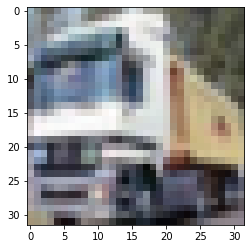

In [ ]:
# Image 1 => in batch 1 is => Bus 
batch1_data_255 = batch1_data
print("Image Label",batch1_labels[1])
g = plt.imshow(batch1_data_255[1])




## 6.2 **Print Second Image** 



Image Label 9


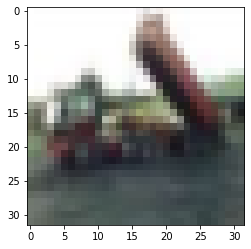

In [ ]:
# Image 2 => is Truck
print("Image Label",batch1_labels[2])
g = plt.imshow(batch1_data_255[2])


Image Label 4


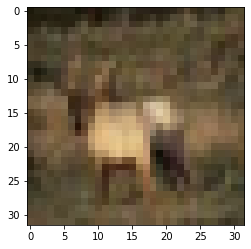

In [ ]:
# image 3 => is deer
print("Image Label",batch1_labels[3])
from matplotlib import pyplot  
pyplot.imshow(batch1_data[3])

pyplot.show()

In [ ]:
%matplotlib inline
from __future__ import print_function
import keras
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns

from keras.datasets import cifar10
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
import os

In [ ]:
(trainX, trainy), (testX, testy) = cifar10.load_data()

170500096/170498071 [==============================] - 2s 0us/step




## 6.3 Print Images From Batch 1 



Train: X=(50000, 32, 32, 3), y=(50000, 1)
Test: X=(10000, 32, 32, 3), y=(10000, 1)


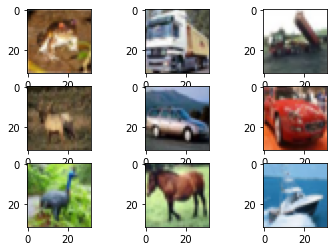

In [ ]:
  
from matplotlib import pyplot
print('Train: X=%s, y=%s' % (trainX.shape, trainy.shape))
print('Test: X=%s, y=%s' % (testX.shape, testy.shape))
# plot first few images
for i in range(9):
	# define subplot
	pyplot.subplot(330 + 1 + i)
	# plot raw pixel data
  
	pyplot.imshow(batch1_data[i])
# show the figure
pyplot.show()



##  6.4 Print Images from Batch 2 



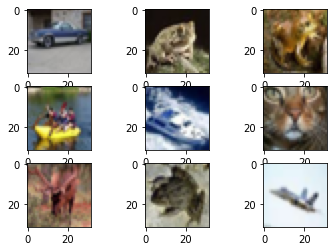

In [ ]:
for i in range(9):
	# define subplot
	pyplot.subplot(330 + 1 + i)
	# plot raw pixel data
  
	pyplot.imshow(batch2_data[i])
# show the figure
pyplot.show()



##  6.5 Print Images from Batch 3 



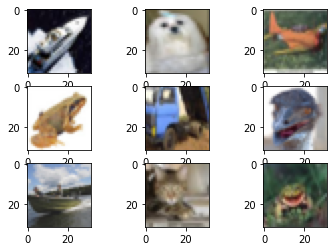

In [ ]:
for i in range(9):
	# define subplot
	pyplot.subplot(330 + 1 + i)
	# plot raw pixel data
  
	pyplot.imshow(batch3_data[i])
# show the figure
pyplot.show()



##  6.6 Print Images from Batch 4 



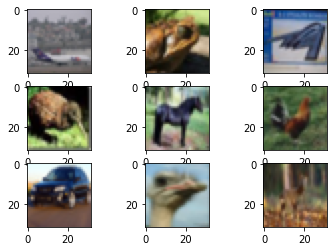

In [ ]:
for i in range(9):
	# define subplot
	pyplot.subplot(330 + 1 + i)
	# plot raw pixel data
  
	pyplot.imshow(batch4_data[i])
# show the figure
pyplot.show()



##  6.7 Print Images from Batch 5 



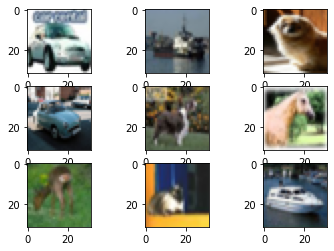

In [ ]:
for i in range(9):
	# define subplot
	pyplot.subplot(330 + 1 + i)
	# plot raw pixel data
  
	pyplot.imshow(batch5_data[i])
# show the figure
pyplot.show()

#  **7) DNN Model**


## Bring Train and Test Data to Required Format

In [ ]:
# The data, split between train and test sets:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

print(y_train.shape, 'train samples')
print(y_test.shape, 'test samples')


print(train_images.shape, 'train samples')
print(test_images.shape, 'test samples')

print("t",type(train_images))
print("t1",type(x_train))

print("l",type(y_train))
print("l1",type(train_labels_data))


it = iter(test_labels_data) 
x = np.fromiter(it, dtype = np.int32) 

train_labels_data = train_labels_data.reshape(50000,1)
test_labels_data = x.reshape(10000,1)

#test_labels_data = test_labels_data.reshape(50000,1)
print("t_l",train_labels_data.shape)
print("t_l1", test_labels_data.shape)

x_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples
(50000, 1) train samples
(10000, 1) test samples
(50000, 32, 32, 3) train samples
(10000, 32, 32, 3) test samples
t <class 'numpy.ndarray'>
t1 <class 'numpy.ndarray'>
l <class 'numpy.ndarray'>
l1 <class 'numpy.ndarray'>
t_l (50000, 1)
t_l1 (10000, 1)


In [ ]:
#x_train
#train_labels_data
#train_images
#y_train

# train_images,train_labels_data,test_images,test_labels_data

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

In [ ]:
'''Xtrain = x_train.reshape((50000, 32*32*3))    # reshape the input set to size 32*32. VEctor of length 784
Xtrain = Xtrain.astype('float32')/255      # normalize to grayscale; set datatype as float32

Xtest = x_test.reshape((10000, 32*32*3))      # reshape the input set to size 28*28. 
Xtest = Xtest.astype('float32')/255        # normalize to grayscale; set datatype as float32

Ytrain = tf.keras.utils.to_categorical(y_train,10)
Ytest = tf.keras.utils.to_categorical(y_test,10)'''

Xtrain = train_images.reshape((50000, 32*32*3))    # reshape the input set to size 32*32. VEctor of length 784
Xtrain = Xtrain.astype('float32')/255      # normalize to grayscale; set datatype as float32

Xtest = test_images.reshape((10000, 32*32*3))      # reshape the input set to size 28*28. 
Xtest = Xtest.astype('float32')/255        # normalize to grayscale; set datatype as float32

Ytrain = tf.keras.utils.to_categorical(train_labels_data,10)
Ytest = tf.keras.utils.to_categorical(test_labels_data,10)


In [ ]:
#Defining function for confusion matrix plot
def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):

    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    #Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

#print(cm)

    fig, ax = plt.subplots(figsize=(7,7))
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')


    #Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")
    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax

np.set_printoptions(precision=2)

In [ ]:
# create Model object
dnnModel = models.Sequential()

Add **Layers**

## 7.1 Model 1 Without Regularization

In [ ]:
num_classes = 10
epochs = 100



#### Model Building

In [ ]:
# MODEL 1 - Without image augmentation - Without L2 regularization - without drop out
M1 = Sequential()

# M1.add(Flatten())
#  Input Layer
M1.add(layers.Dense(728, activation='relu', input_shape=  (32*32*3,)))

#  Hidden Layer 1
M1.add(layers.Dense(512, activation='relu'))

#  Hidden Layer 2
M1.add(layers.Dense(256, activation='relu'))
#  Hidden Layer 3
M1.add(Dense(128, activation='relu'))

M1.add(layers.Dense(num_classes, activation='sigmoid'))
M1.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_20 (Dense)             (None, 728)               2237144   
_________________________________________________________________
dense_21 (Dense)             (None, 512)               373248    
_________________________________________________________________
dense_22 (Dense)             (None, 256)               131328    
_________________________________________________________________
dense_23 (Dense)             (None, 128)               32896     
_________________________________________________________________
dense_24 (Dense)             (None, 10)                1290      
Total params: 2,775,906
Trainable params: 2,775,906
Non-trainable params: 0
_________________________________________________________________


#### Model Compilation

In [ ]:
#Compile MODEL 1
M1.compile(
    optimizer=keras.optimizers.Adam(1e-3),
    loss="binary_crossentropy",
    metrics=["accuracy"],
)

#### Model Training

In [ ]:
history=M1.fit(Xtrain, Ytrain, batch_size=128, epochs=epochs, validation_data=(Xtest, Ytest))

Epoch 1/100
391/391 [==============================] - 3s 8ms/step - loss: 0.2871 - accuracy: 0.3076 - val_loss: 0.2789 - val_accuracy: 0.3298
Epoch 2/100
391/391 [==============================] - 3s 7ms/step - loss: 0.2552 - accuracy: 0.3972 - val_loss: 0.2444 - val_accuracy: 0.4298
Epoch 3/100
391/391 [==============================] - 3s 7ms/step - loss: 0.2417 - accuracy: 0.4347 - val_loss: 0.2335 - val_accuracy: 0.4620
Epoch 4/100
391/391 [==============================] - 3s 7ms/step - loss: 0.2323 - accuracy: 0.4594 - val_loss: 0.2341 - val_accuracy: 0.4555
Epoch 5/100
391/391 [==============================] - 3s 7ms/step - loss: 0.2255 - accuracy: 0.4768 - val_loss: 0.2297 - val_accuracy: 0.4651
Epoch 6/100
391/391 [==============================] - 3s 7ms/step - loss: 0.2210 - accuracy: 0.4881 - val_loss: 0.2276 - val_accuracy: 0.4725
Epoch 7/100
391/391 [==============================] - 3s 7ms/step - loss: 0.2158 - accuracy: 0.5046 - val_loss: 0.2222 - val_accuracy: 0.4851

#### Model Evaluation - Print Train/Test Accuracy

In [ ]:
print('Final training loss \t', history.history['loss'][-1])
print('Final training accuracy ', history.history['accuracy'][-1])

Final training loss 	 0.02949342131614685
Final training accuracy  0.9558200240135193


In [ ]:
# Generate generalization metrics
score = M1.evaluate(Xtest, Ytest, verbose=0)
print(f'Test loss for Keras ReLU : {score[0]} / Test accuracy: {score[1]}')


Test loss for Keras ReLU : 0.714108407497406 / Test accuracy: 0.4932999908924103


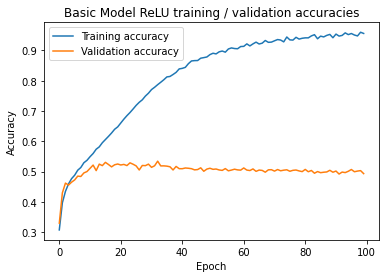

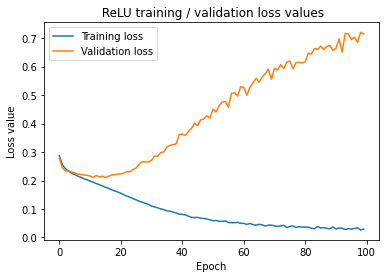

In [ ]:
# Visualize model history
plt.plot(history.history['accuracy'], label='Training accuracy')
plt.plot(history.history['val_accuracy'], label='Validation accuracy')
plt.title('Basic Model ReLU training / validation accuracies')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc="upper left")
plt.show()

plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.title(' ReLU training / validation loss values')
plt.ylabel('Loss value')
plt.xlabel('Epoch')
plt.legend(loc="upper left")
plt.show()

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
Confusion matrix, without normalization


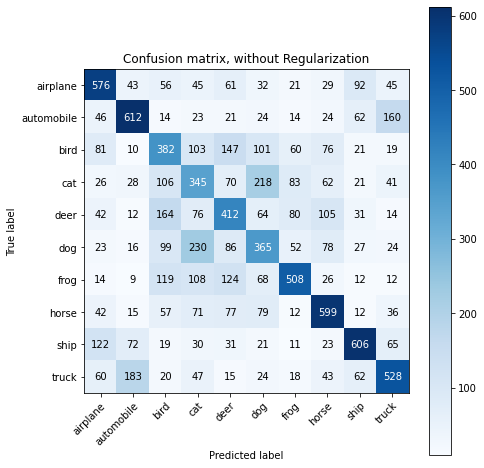

In [ ]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
# Predict the values from the validation dataset

y_pred=M1.predict_classes(Xtest)
y_true=np.argmax(Ytest,axis=1)

# compute the confusion matrix
#confusion_mtx = confusion_matrix(y_true,y_pred) 
class_names=['airplane',
'automobile',
'bird',        
'cat' ,        
'deer' ,       
'dog' ,        
'frog' ,       
'horse' ,      
'ship'   ,     
'truck'       ]

plot_confusion_matrix(y_true, y_pred, classes = class_names, title='Confusion matrix, without Regularization')



## 7.2 Model 2 - With Regularization

In [ ]:
from keras.regularizers import l2
from tensorflow.keras import regularizers
# MODEL 2 - With L2 regularization - without drop out
M2 = Sequential()

# M2.add(Flatten())
#  Input Layer
M2.add(layers.Dense(728, activation='relu', kernel_regularizer=regularizers.l2(0.001),input_shape=  (32*32*3,)))

#  Hidden Layer 1
M2.add(layers.Dense(512,kernel_regularizer=regularizers.l2(0.001), activation='relu'))

#  Hidden Layer 2
M2.add(layers.Dense(256, kernel_regularizer=regularizers.l2(0.001),activation='relu'))
#  Hidden Layer 3
M2.add(Dense(128, activation='relu',kernel_regularizer=regularizers.l2(0.001)))

M2.add(layers.Dense(num_classes, activation='sigmoid'))
M2.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_25 (Dense)             (None, 728)               2237144   
_________________________________________________________________
dense_26 (Dense)             (None, 512)               373248    
_________________________________________________________________
dense_27 (Dense)             (None, 256)               131328    
_________________________________________________________________
dense_28 (Dense)             (None, 128)               32896     
_________________________________________________________________
dense_29 (Dense)             (None, 10)                1290      
Total params: 2,775,906
Trainable params: 2,775,906
Non-trainable params: 0
_________________________________________________________________


In [ ]:
#Compile MODEL 2
M2.compile(
    optimizer=keras.optimizers.Adam(1e-3),
    loss="categorical_crossentropy",
    metrics=["accuracy"],
)

In [ ]:

h_M2=M2.fit(Xtrain, Ytrain, batch_size=128, epochs=epochs, validation_data=(Xtest, Ytest))

Epoch 1/100
391/391 [==============================] - 3s 8ms/step - loss: 1.6388 - accuracy: 0.4140 - val_loss: 1.6518 - val_accuracy: 0.4208
Epoch 2/100
391/391 [==============================] - 3s 7ms/step - loss: 1.6206 - accuracy: 0.4218 - val_loss: 1.7545 - val_accuracy: 0.3684
Epoch 3/100
391/391 [==============================] - 3s 7ms/step - loss: 1.6095 - accuracy: 0.4258 - val_loss: 1.6135 - val_accuracy: 0.4301
Epoch 4/100
391/391 [==============================] - 3s 7ms/step - loss: 1.6067 - accuracy: 0.4282 - val_loss: 1.5990 - val_accuracy: 0.4369
Epoch 5/100
391/391 [==============================] - 3s 7ms/step - loss: 1.6020 - accuracy: 0.4319 - val_loss: 1.6307 - val_accuracy: 0.4281
Epoch 6/100
391/391 [==============================] - 3s 7ms/step - loss: 1.5957 - accuracy: 0.4352 - val_loss: 1.6676 - val_accuracy: 0.4144
Epoch 7/100
391/391 [==============================] - 3s 7ms/step - loss: 1.5837 - accuracy: 0.4425 - val_loss: 1.5796 - val_accuracy: 0.4503

In [ ]:
print('Final training loss \t', h_M2.history['loss'][-1])
print('Final training accuracy ', h_M2.history['accuracy'][-1])

Final training loss 	 1.5313043594360352
Final training accuracy  0.4736599922180176


In [ ]:
# Generate generalization metrics
score = M2.evaluate(Xtest, Ytest, verbose=0)
print(f'Test loss for Keras ReLU With Regularization: {score[0]} / Test accuracy: {score[1]}')

Test loss for Keras ReLU With Regularization: 1.608795166015625 / Test accuracy: 0.4555000066757202


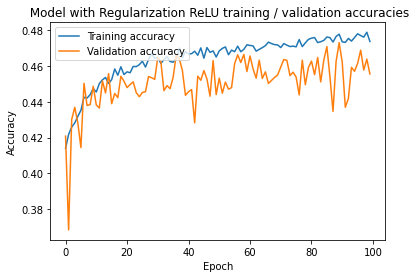

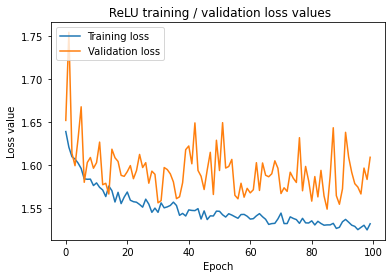

In [ ]:
# Visualize model history
plt.plot(h_M2.history['accuracy'], label='Training accuracy')
plt.plot(h_M2.history['val_accuracy'], label='Validation accuracy')
plt.title(' Model with Regularization ReLU training / validation accuracies')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc="upper left")
plt.show()

plt.plot(h_M2.history['loss'], label='Training loss')
plt.plot(h_M2.history['val_loss'], label='Validation loss')
plt.title(' ReLU training / validation loss values')
plt.ylabel('Loss value')
plt.xlabel('Epoch')
plt.legend(loc="upper left")
plt.show()

Confusion matrix, without normalization


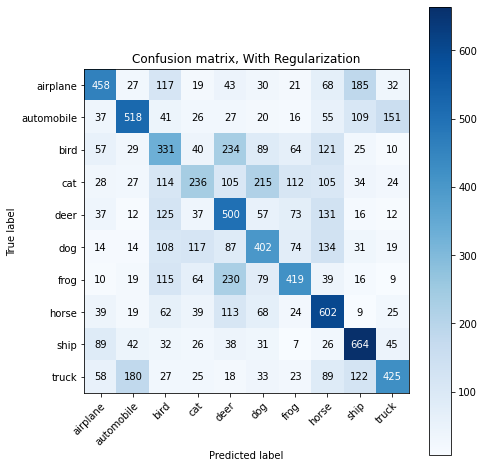

In [ ]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
# Predict the values from the validation dataset

y_pred=M2.predict_classes(Xtest)
y_true=np.argmax(Ytest,axis=1)

# compute the confusion matrix
#confusion_mtx = confusion_matrix(y_true,y_pred) 
class_names=['airplane',
'automobile',
'bird',        
'cat' ,        
'deer' ,       
'dog' ,        
'frog' ,       
'horse' ,      
'ship'   ,     
'truck'       ]

plot_confusion_matrix(y_true, y_pred, classes = class_names, title='Confusion matrix, With Regularization')



## 7.3 **Model 3 With Regularization and Drop Out** 



In [ ]:
from keras.regularizers import l2
from tensorflow.keras import regularizers
# create Model object
from keras import optimizers

In [ ]:

# MODEL 3 - With L2 regularization - With drop out
M3 = Sequential()

#  Input Layer
M3.add(layers.Dense(728, activation='relu', kernel_regularizer=regularizers.l2(0.001),input_shape=  (32*32*3,)))
#M3.add(Dropout(0.5)) 
#  Hidden Layer 1
M3.add(layers.Dense(512,kernel_regularizer=regularizers.l2(0.001), activation='relu'))
M3.add(Dropout(0.5)) 
#  Hidden Layer 2
M3.add(layers.Dense(256, kernel_regularizer=regularizers.l2(0.001),activation='relu'))
M3.add(Dropout(0.5)) 
#  Hidden Layer 3
M3.add(Dense(128, activation='relu',kernel_regularizer=regularizers.l2(0.001)))
M3.add(Dropout(0.25)) 

M3.add(layers.Dense(num_classes, activation='sigmoid'))
#M3.add(Dropout(0.5)) 
M3.summary()


Model: "sequential_20"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_95 (Dense)             (None, 728)               2237144   
_________________________________________________________________
dense_96 (Dense)             (None, 512)               373248    
_________________________________________________________________
dropout_30 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_97 (Dense)             (None, 256)               131328    
_________________________________________________________________
dropout_31 (Dropout)         (None, 256)               0         
_________________________________________________________________
dense_98 (Dense)             (None, 128)               32896     
_________________________________________________________________
dropout_32 (Dropout)         (None, 128)             

In [ ]:
#Compile MODEL 3
M3.compile(
    optimizer=keras.optimizers.Adam(1e-4),
    loss="categorical_crossentropy",
    metrics=["accuracy"],
)

In [ ]:

h_M3=M3.fit(Xtrain, Ytrain, batch_size=128, epochs=epochs, validation_data=(Xtest, Ytest))

Epoch 1/100
391/391 [==============================] - 3s 8ms/step - loss: nan - accuracy: 0.0998 - val_loss: nan - val_accuracy: 0.1000
Epoch 2/100
391/391 [==============================] - 3s 8ms/step - loss: nan - accuracy: 0.1000 - val_loss: nan - val_accuracy: 0.1000
Epoch 3/100
391/391 [==============================] - 3s 8ms/step - loss: nan - accuracy: 0.1000 - val_loss: nan - val_accuracy: 0.1000
Epoch 4/100
391/391 [==============================] - 3s 8ms/step - loss: nan - accuracy: 0.1000 - val_loss: nan - val_accuracy: 0.1000
Epoch 5/100
391/391 [==============================] - 3s 7ms/step - loss: nan - accuracy: 0.1000 - val_loss: nan - val_accuracy: 0.1000
Epoch 6/100
391/391 [==============================] - 3s 8ms/step - loss: nan - accuracy: 0.1000 - val_loss: nan - val_accuracy: 0.1000
Epoch 7/100
391/391 [==============================] - 3s 8ms/step - loss: nan - accuracy: 0.1000 - val_loss: nan - val_accuracy: 0.1000
Epoch 8/100
391/391 [====================

In [ ]:
print('Final training loss \t', h_M3.history['loss'][-1])
print('Final training accuracy ', h_M3.history['accuracy'][-1])

Final training loss 	 0.992183268070221
Final training accuracy  0.7472599744796753


In [ ]:
# Generate generalization metrics
score = M3.evaluate(Xtest, Ytest, verbose=0)
print(f'Test loss for Keras ReLU With Regularization: {score[0]} / Test accuracy: {score[1]}')

Test loss for Keras ReLU With Regularization: 1.6745660305023193 / Test accuracy: 0.5598000288009644


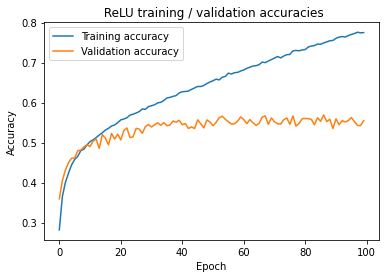

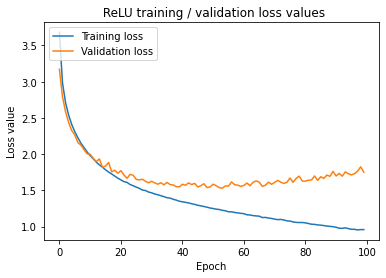

In [ ]:

# Visualize model history
plt.plot(h_M3.history['accuracy'], label='Training accuracy')
plt.plot(h_M3.history['val_accuracy'], label='Validation accuracy')
plt.title(' ReLU training / validation accuracies')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc="upper left")
plt.show()

plt.plot(h_M3.history['loss'], label='Training loss')
plt.plot(h_M3.history['val_loss'], label='Validation loss')
plt.title(' ReLU training / validation loss values')
plt.ylabel('Loss value')
plt.xlabel('Epoch')
plt.legend(loc="upper left")
plt.show()

In [ ]:
print(x_test.shape)

(10000, 32, 32, 3)


Confusion matrix, without normalization


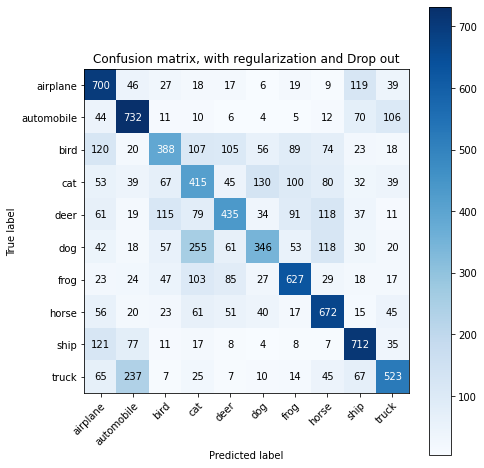

In [ ]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
# Predict the values from the validation dataset

y_pred=M3.predict_classes(Xtest)
y_true=np.argmax(Ytest,axis=1)

# compute the confusion matrix
#confusion_mtx = confusion_matrix(y_true,y_pred) 
class_names=['airplane',
'automobile',
'bird',        
'cat' ,        
'deer' ,       
'dog' ,        
'frog' ,       
'horse' ,      
'ship'   ,     
'truck'       ]

plot_confusion_matrix(y_true, y_pred, classes = class_names, title='Confusion matrix, with regularization and Drop out')



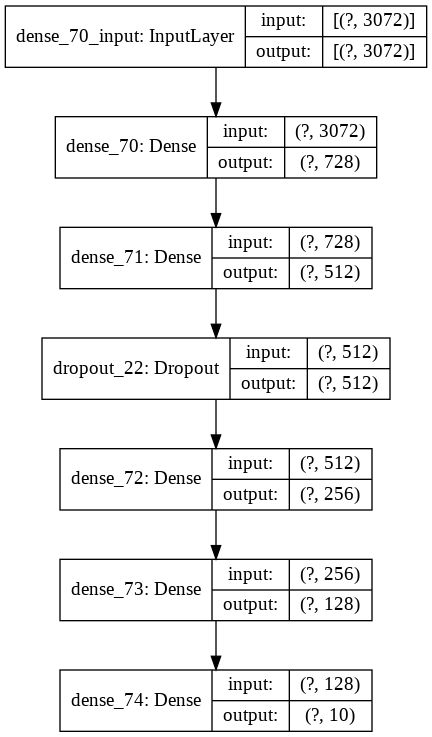

In [ ]:
#Plot model
keras.utils.plot_model(M3, show_shapes=True)

# 8 Evaluation

## Model Comparisions

**Concepts in Machine Learning :**

Training Error : Error computed on Training Set
Test Error / Generalization Error : Error Computed on the Test Set

**Underfitting** :
  Unable to obtain a sufficiently low error value on training set.

**Over Fitting** :
  Occurs When Gap between Training Error and Test Error is too large. 

**Regularization** :  is any modification we make to a learning algorithm that is intended to reduce its generalization error but not its training error.

       J(w) = MSEtrain + λwtw

Using the Weights ,we aim to fit a higher degree model to the Machine Learning problem. We then contriol the degree of the polynomial model using the weight decay process. 


**(I) Model 1 :** 

      1. Basic Model -  Created Without Regulairization and Drop Out
      2. Number of Layers = > 1 Input + 3 Hidden + 1 Output Layer
      3. Activation Function => Used is "Relu" , "Sigmoid"
         "Relu" : Is Used for all Hidden Layers
         "Sigmoid" :Used for output layer

      4. Input is provided as (32*32*3)
          Since the Training data consists of 50000 images with 32,32,3 
          Shape => (50000,32,32,3)
          i.e. 50000 Images , with Dimensions of 32*32 with 3 Layers of RGB.
          Hence the input is provided as Dimensions of Single image which is 
          32*32*3

      5. The Layer in the Deep Network Are Sequential Densely connected layers.
      6. The following parameters are used to compile the Model:
         Loss function — Adam 
         Optimizer — Classification_CrossEntropy
         Metrics — Accuracy.

      This model M1 has Training Accuracy => 95.58%
                     Training Loss => 2.95%
                     Validation Accuracy => 49.33%
                     Validation Loss => 71.41%


   

** (II) Model 2 : ** 

1. Model 2 is Created with Regulairization.
2. Model 1 Though has a High Accuracy it suffers from Problem of Overfitting.
   i.e There is large gap between the Training and Test (or validation ) Error.
3. Hence in order to control the Over fitting , we have used L2 regularizer.
   L1 Regularization : > penalizes weights in proportion to the sum of 
                         the absolute values of the weights. 
                       > makes the weights of irrelevant or less relevant
                         features to exactly 0
   L2 Regularization : > penalizes weights in proportion to the sum of the  
                         squares of the weights
                       > makes the weights of irrelevant 
                         features to near zero but not 0.
   In this Model , we have used L2 Regularization with Value as 0.001.
   L2 Regulrizer avoids sparseness in layer also avoids skipping the effect of  
   some irrelevant featuire.

   This model M2 has
                     Training Accuracy => 47%
                     Training Loss => 1.513
                     Validation Accuracy => 45.5%
                     Validation Loss => 1.608


** (III) Model 3 : ** 

1. Model 3 is Created with Regulairization and with Drop out.
2. Drop out is another Technique for Resularization:
    
3. Dropout, consists of randomly "dropping out"  a number of output features of 
   the layer during training(i.e. the features are set to zero) .
loss: 0.9583 - accuracy: 0.7752 - val_loss: 1.7500 - val_accuracy: 0.5550
4. This model M3 has
                     Training Accuracy => 77.52%
                     Training Loss => 0.9583
                     Validation Accuracy => 1.7500%
                     Validation Loss => 55.50%   
                

## Recap
   1. Model M3 Performs Better than M1 and M2.
    
   2. M1 - Base Model without Regularization
   3. M2 - Model with Regularization
   3. M3 - Model with Regularization and Dropout


   The Model Accuracy of M3 is higher than M2.
   With Regularization , the problem of over fitting is reduced.
   In Addition to Regularization , Adding Drop out has increased , the 
   accuracy  further